In [2]:
#%pip install seaborn pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('Cleaned_ships_data.csv')

# Просмотр первых строк датасета
data.head()

,Company_Name,ship_name,built_year,gt,dwt,length,width
0,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
1,MSC LORETO,Container Ship,2023,236184,240000,399,60
2,MSC FEBE,Container Ship,2019,232618,228149,400,62
3,MSC ARINA,Container Ship,2019,228741,228111,400,61
4,EVER GOVERN,Container Ship,2019,219688,198937,400,59


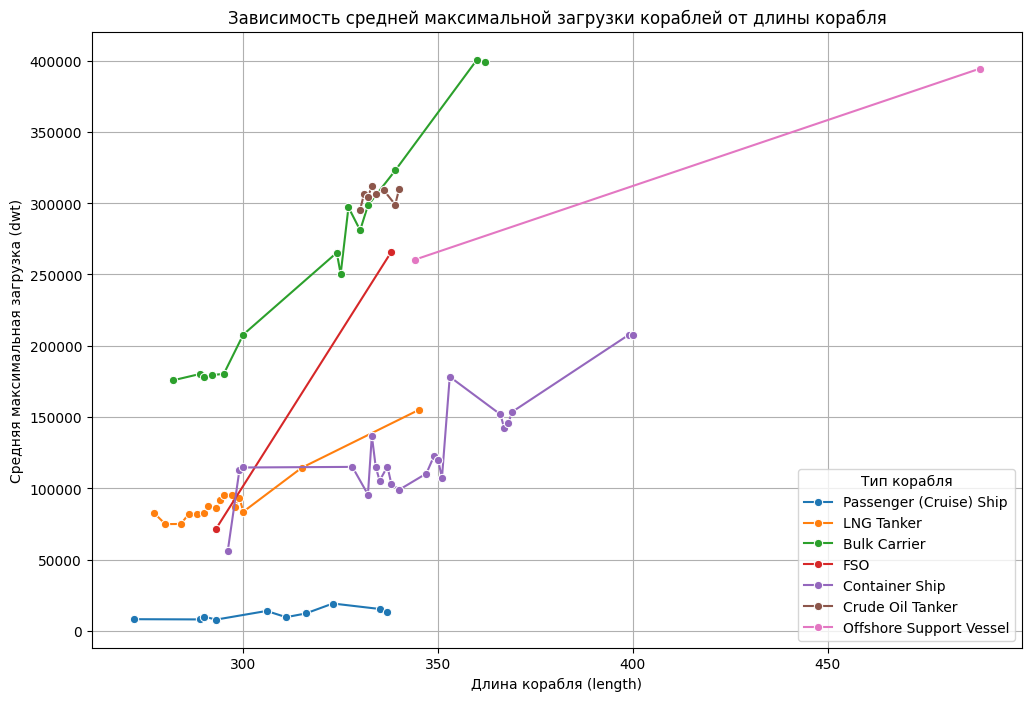

In [26]:
average_dwt_length = data.groupby(['length', 'ship_name'])['dwt'].mean().reset_index()

# Построение графика
plt.figure(figsize=(12, 8))
sns.lineplot(data=average_dwt_length, x='length', y='dwt', hue='ship_name', marker='o')

# Настройка графика
plt.title('Зависимость средней максимальной загрузки кораблей от длины корабля')
plt.xlabel('Длина корабля (length)')
plt.ylabel('Средняя максимальная загрузка (dwt)')
plt.legend(title='Тип корабля', bbox_to_anchor=(1, 0), loc='lower right')
plt.grid(True)

# Показать график
plt.show()

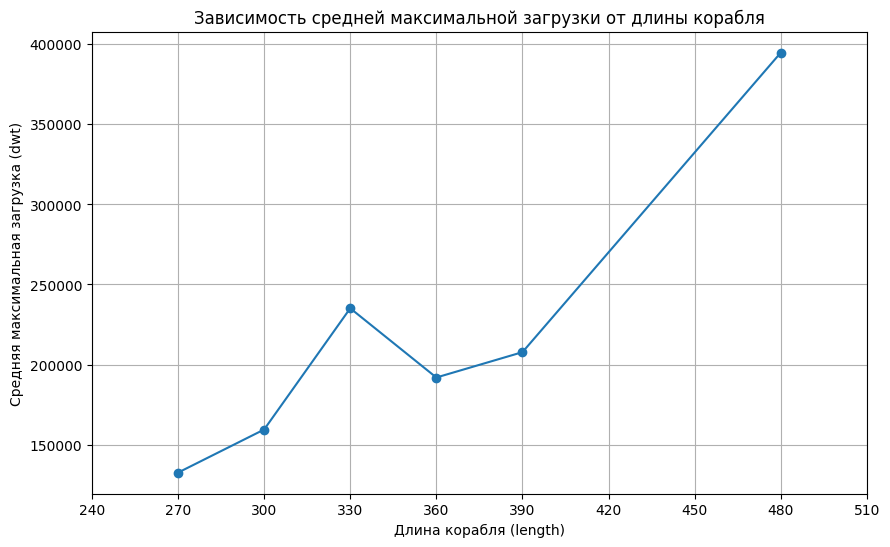

In [20]:
# Создаем новую колонку для округления длины до ближайших 30
data['length_group'] = (data['length'] // 30) * 30

# Группируем данные по новой колонке и получаем среднее значение dwt
mean_dwt = data.groupby('length_group')['dwt'].mean().reset_index()
# Сохраняем пустые интервалы
all_length_groups = np.arange(240, 500 + 30, 30)
mean_dwt_full = pd.DataFrame({'length_group': all_length_groups})
# Объединяем данные с пустыми интервалами
mean_dwt_full = mean_dwt_full.merge(mean_dwt, on='length_group', how='left')

plt.figure(figsize=(10, 6))
plt.plot(mean_dwt['length_group'], mean_dwt['dwt'], marker='o', linestyle='-')
plt.title('Зависимость средней максимальной загрузки от длины корабля')
plt.xlabel('Длина корабля (length)')
plt.ylabel('Средняя максимальная загрузка (dwt)')
plt.xticks(mean_dwt_full['length_group'])  # Устанавливаем метки для оси X
plt.grid()
plt.show()

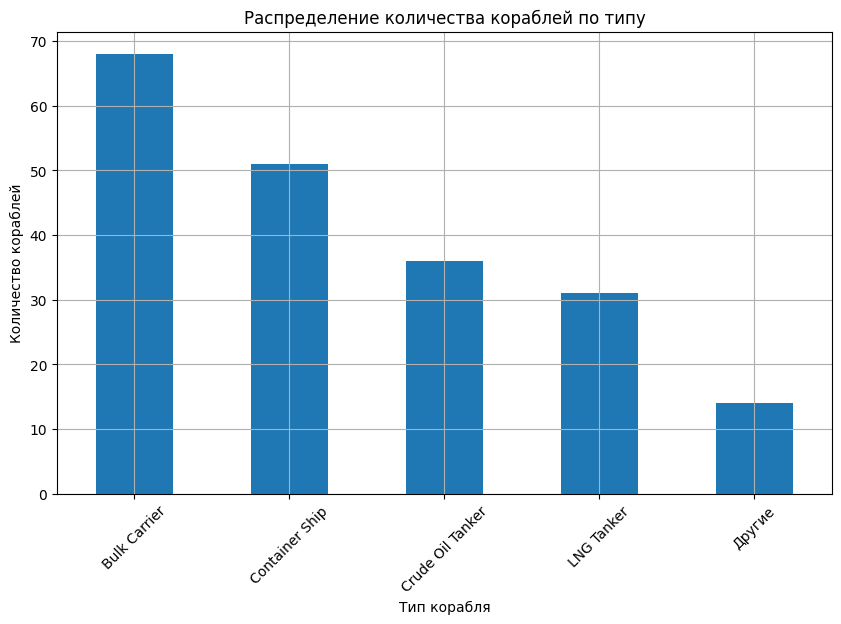

In [21]:
# Подсчет количества кораблей по типу
ship_counts = data['ship_name'].value_counts()

# Объединение менее распространенных типов в категорию "Другие"
threshold = 10
ship_counts_reduced = ship_counts[ship_counts > threshold]
ship_counts_other = ship_counts[ship_counts <= threshold].sum()
ship_counts_reduced['Другие'] = ship_counts_other

# Построение графика
plt.figure(figsize=(10, 6))
ship_counts_reduced.plot(kind='bar')
plt.title('Распределение количества кораблей по типу')
plt.xlabel('Тип корабля')
plt.ylabel('Количество кораблей')
plt.xticks(rotation=45)
plt.grid()
plt.show()

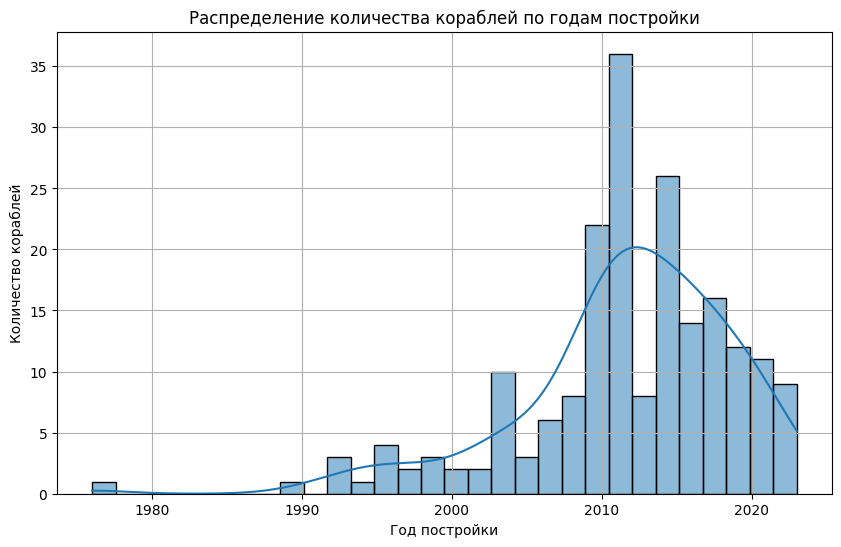

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['built_year'], bins=30, kde=False)
plt.title('Распределение количества кораблей по годам постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество кораблей')
plt.grid()
plt.show()

In [23]:
# Определяем 20 равных диапазонов
bins = np.linspace(dwt_min, dwt_max, 21)

# Создаем 2-D гистограмму
plt.figure(figsize=(12, 6))
plt.hist2d(data['built_year'], data['dwt'], bins=[data['built_year'].nunique(), bins], cmap='Blues')

# Добавление цветового бара
plt.colorbar(label='Количество кораблей')

# Настройка графика
plt.title('Распределение количества кораблей по годам постройки и максимальному весу груза')
plt.xlabel('Год постройки')
plt.ylabel('Максимальный вес груза (dwt)')
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для удобства
plt.grid(True)

# Отображение графика
plt.show()

NameError: name 'dwt_min' is not defined